In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visualisasi
sns.set(style='whitegrid')

# Muat dataset dari path input Kaggle
train_path = r"C:\Semester 7 Gass\SisRek\Proyek Sisrek\train.csv"
test_path = r"C:\Semester 7 Gass\SisRek\Proyek Sisrek\test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Lihat 5 baris pertama data latih
print("Data Latih (train.csv)")
print(df_train.head())
print("\n")

# Lihat 5 baris pertama data tes
print("Data Tes (test.csv)")
print(df_test.head())
print("\n")

Data Latih (train.csv)
   user_id  product_id                              product_name  rating  \
0     1813      154533                           Beautiful Thing       5   
1     1944      192838                             Almost Famous       5   
2      534      202590                        A Clockwork Orange       5   
3     1811      140456  Great Expectations (Wordsworth Classics)       4   
4      102      154278                                Phenomenon       5   

   votes  helpful_votes  ID  
0     10              8   0  
1      4              2   1  
2      5              5   2  
3      1              0   3  
4      0              0   4  


Data Tes (test.csv)
   ID  user_id  product_id                                       product_name
0   0     1916      185507                                  Maria [Australia]
1   1     1759      143430  The Mitchells: Five for Victory (Van Stockum, ...
2   2     1980      155861                     Superman Cartoons of Max & Dav
3   3 

In [2]:
print("Info Data Latih")
df_train.info()
print("\n")

print("Info Data Tes")
df_test.info()
print("\n")

Info Data Latih
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745889 entries, 0 to 745888
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        745889 non-null  int64 
 1   product_id     745889 non-null  int64 
 2   product_name   745889 non-null  object
 3   rating         745889 non-null  int64 
 4   votes          745889 non-null  int64 
 5   helpful_votes  745889 non-null  int64 
 6   ID             745889 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 39.8+ MB


Info Data Tes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223553 entries, 0 to 223552
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            223553 non-null  int64 
 1   user_id       223553 non-null  int64 
 2   product_id    223553 non-null  int64 
 3   product_name  223553 non-null  object
dtypes: int64(3), object(1)
memory usage: 6

In [3]:
# Hitung jumlah user dan produk di data latih
n_users = df_train['user_id'].nunique()
n_items = df_train['product_id'].nunique()
n_ratings = len(df_train)

print(f"Jumlah User: {n_users}")
print(f"Jumlah Produk: {n_items}")
print(f"Jumlah Total Rating: {n_ratings}")
print("\n")

# Cek statistik deskriptif untuk kolom numerik (terutama rating)
print("Statistik Deskriptif Data Latih")
# hanya fokus pada 'rating', 'votes', dan 'helpful_votes'
print(df_train[['rating', 'votes', 'helpful_votes']].describe())
print("\n")

Jumlah User: 2000
Jumlah Produk: 201325
Jumlah Total Rating: 745889


Statistik Deskriptif Data Latih
              rating          votes  helpful_votes
count  745889.000000  745889.000000  745889.000000
mean        4.238671       7.408667       5.381212
std         1.072359      16.949467      13.089394
min         1.000000       0.000000       0.000000
25%         4.000000       1.000000       1.000000
50%         5.000000       4.000000       2.000000
75%         5.000000       8.000000       6.000000
max         5.000000    3740.000000    2537.000000




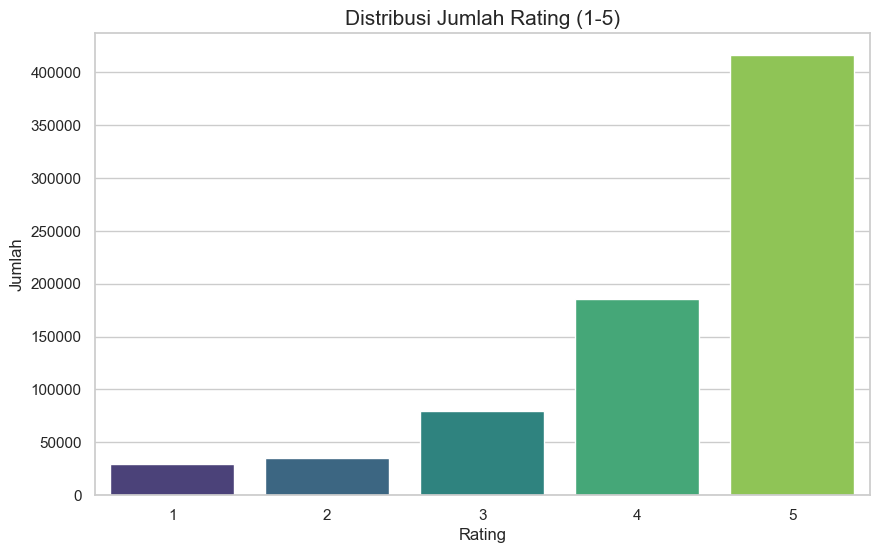

In [4]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_train, palette='viridis')
plt.title('Distribusi Jumlah Rating (1-5)', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

In [5]:
# Hitung sparsity
total_possible_ratings = n_users * n_items
sparsity = (1 - (n_ratings / total_possible_ratings)) * 100

print(f"Total Kemungkinan Interaksi (Users * Produk): {total_possible_ratings}")
print(f"Interaksi yang Tercatat: {n_ratings}")
print(f"Sparsity (Tingkat Kekosongan) Matriks: {sparsity:.2f}%")
print("\n")

Total Kemungkinan Interaksi (Users * Produk): 402650000
Interaksi yang Tercatat: 745889
Sparsity (Tingkat Kekosongan) Matriks: 99.81%




In [6]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic

# Definisikan skala rating
reader = Reader(rating_scale=(1, 5))


data = Dataset.load_from_df(df_train[['user_id', 'product_id', 'rating']], reader)

# Membuat model KNN Basic (Collaborative Filtering)
algo = KNNBasic()

# Melakukan cross-validation (misal 5-fold)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0157  1.0164  1.0171  1.0161  1.0205  1.0172  0.0017  
MAE (testset)     0.7251  0.7254  0.7271  0.7249  0.7285  0.7262  0.0014  
Fit time          1.04    1.21    1.26    1.22    1.18    1.18    0.08    
Test time         4.46    4.28    4.62    4.18    4.36    4.38    0.15    


{'test_rmse': array([1.01571314, 1.01639836, 1.01709955, 1.01608557, 1.02049882]),
 'test_mae': array([0.72511624, 0.72539928, 0.72708664, 0.72488645, 0.72848384]),
 'fit_time': (1.0397489070892334,
  1.2135307788848877,
  1.2585015296936035,
  1.218449354171753,
  1.1806354522705078),
 'test_time': (4.463063478469849,
  4.2818763256073,
  4.616089820861816,
  4.1785569190979,
  4.36446213722229)}

In [7]:
print("Mengevaluasi Baseline: User-Based CF (UBCF)")

# Konfigurasi model untuk User-Based
sim_options_ubcf = {
    'name': 'msd',
    'user_based': True
}

# Buat model KNNBasic dengan konfigurasi di atas
model_ubcf = KNNBasic(sim_options=sim_options_ubcf)

# Jalankan 3-fold cross-validation
# 'cv=3' membagi data menjadi 3 bagian, melatih 2, menguji 1, dan diulang 3x
results_ubcf = cross_validate(model_ubcf, data, measures=['RMSE'], cv=3, verbose=True)

print("\n Hasil User-Based CF")
# Ambil rata-rata RMSE dari 3-fold
print(f"Rata-rata RMSE: {results_ubcf['test_rmse'].mean():.4f}")
print("\n")

Mengevaluasi Baseline: User-Based CF (UBCF)
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0335  1.0342  1.0374  1.0351  0.0017  
Fit time          0.79    0.91    0.85    0.85    0.05    
Test time         7.37    6.05    5.60    6.34    0.75    

 Hasil User-Based CF
Rata-rata RMSE: 1.0351




In [8]:
# Buat model UBCF yang akan dilatih
model_ubcf_final = KNNBasic(sim_options=sim_options_ubcf)

#Siapkan data latih lengkap
trainset = data.build_full_trainset()

# Latih model pada seluruh data latih
model_ubcf_final.fit(trainset)

# Buat prediksi untuk data tes
predictions_ubcf = []
for index, row in df_test.iterrows():

    pred = model_ubcf_final.predict(uid=row['user_id'], iid=row['product_id'])
    predictions_ubcf.append(pred.est)

# Klip rating agar tetap di rentang 1-5
clipped_predictions_ubcf = np.clip(predictions_ubcf, 1, 5)

#Simpan hasil prediksi ke DataFrame untuk dilihat
predictions_ubcf_df = pd.DataFrame({
    'ID': df_test['ID'],
    'user_id': df_test['user_id'],
    'product_id': df_test['product_id'],
    'predicted_rating_UBCF': clipped_predictions_ubcf # Nama kolom diubah untuk kejelasan
})

print("\n 10 Prediksi Teratas dari User-Based CF (UBCF)")
print(predictions_ubcf_df.head(10))

Computing the msd similarity matrix...
Done computing similarity matrix.

 10 Prediksi Teratas dari User-Based CF (UBCF)
   ID  user_id  product_id  predicted_rating_UBCF
0   0     1916      185507               5.000000
1   1     1759      143430               4.238671
2   2     1980      155861               4.635576
3   3     1502       71535               3.723820
4   4     1255       13521               4.518228
5   5      990      123928               4.308317
6   6      658       39924               3.843374
7   7      293      209222               4.603887
8   8      339      216438               3.581793
9   9     1589       22375               4.084809


In [9]:
from surprise import SVD

print("Mengevaluasi Model Advanced: SVD")

# Buat model SVD
model_svd = SVD()

# Jalankan 3-fold cross-validation
results_svd = cross_validate(model_svd, data, measures=['RMSE'], cv=3, verbose=True)

print("\n Hasil SVD")
# Ambil rata-rata RMSE dari 3-fold
print(f"Rata-rata RMSE: {results_svd['test_rmse'].mean():.4f}")
print("\n")

Mengevaluasi Model Advanced: SVD
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9450  0.9458  0.9484  0.9464  0.0015  
Fit time          8.95    9.12    8.95    9.00    0.08    
Test time         2.55    2.04    2.15    2.25    0.22    

 Hasil SVD
Rata-rata RMSE: 0.9464




In [10]:
# Buat model SVD() default
final_model = SVD()

# Siapkan data latih LENGKAP
trainset = data.build_full_trainset()

# Latih model pada SELURUH data latih
final_model.fit(trainset)

# Buat prediksi untuk data tes dan simpan ke list
predictions_default = []
for index, row in df_test.iterrows():
    pred = final_model.predict(uid=row['user_id'], iid=row['product_id'])
    predictions_default.append(pred.est)

# Klip rating agar tetap di rentang 1-5
clipped_predictions_default = np.clip(predictions_default, 1, 5)

# Simpan hasil prediksi ke DataFrame
predictions_df_default = pd.DataFrame({
    'ID': df_test['ID'],
    'user_id': df_test['user_id'],
    'product_id': df_test['product_id'],
    'predicted_rating': clipped_predictions_default
})

print("\n10 Prediksi Teratas dari SVD Default")
print(predictions_df_default.head(10))


10 Prediksi Teratas dari SVD Default
   ID  user_id  product_id  predicted_rating
0   0     1916      185507          4.213904
1   1     1759      143430          4.174459
2   2     1980      155861          4.230396
3   3     1502       71535          3.859408
4   4     1255       13521          4.056366
5   5      990      123928          4.169307
6   6      658       39924          3.640494
7   7      293      209222          4.354219
8   8      339      216438          4.071754
9   9     1589       22375          4.431605


In [11]:
from surprise.model_selection import GridSearchCV

# HYPERPARAMETER TUNING 

df_sample = df_train.sample(frac=1.0, random_state=42)
data_sample = Dataset.load_from_df(df_sample[['user_id', 'product_id', 'rating']], reader)

# Tentukan 'grid' parameter yang ingin dicoba
param_grid = {
    'n_factors': [50, 100], 
    'n_epochs': [20, 30],  
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.1]  
}

# Jalankan GridSearch pada sampel data
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data_sample)

# skor RMSE terbaik dari proses tuning
print(f"\nRMSE terbaik di sampel: {gs.best_score['rmse']:.4f}")
# ------------------------------------

#parameter terbaik yang ditemukan
best_params = gs.best_params['rmse']
print("Parameter terbaik yang ditemukan:", best_params)


# Buat model SVD baru dengan parameter terbaik yang ditemukan
final_model_tuned = SVD(
    n_factors=best_params['n_factors'],
    n_epochs=best_params['n_epochs'],
    lr_all=best_params['lr_all'],
    reg_all=best_params['reg_all']
)

# Latih model pada seluruh data latih
final_model_tuned.fit(trainset)

# Buat prediksi untuk data tes
predictions_tuned = []
for index, row in df_test.iterrows():
    pred = final_model_tuned.predict(uid=row['user_id'], iid=row['product_id'])
    predictions_tuned.append(pred.est)

# Klip rating agar tetap di rentang 1-5
clipped_predictions_tuned = np.clip(predictions_tuned, 1, 5)

# Simpan hasil prediksi ke DataFrame
predictions_df_tuned = pd.DataFrame({
    'ID': df_test['ID'],
    'user_id': df_test['user_id'],
    'product_id': df_test['product_id'],
    'predicted_rating': clipped_predictions_tuned
})

print("\n 10 Prediksi Teratas dari SVD Hasil Tuning")
print(predictions_df_tuned.head(10))


RMSE terbaik di sampel: 0.9245
Parameter terbaik yang ditemukan: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}

 10 Prediksi Teratas dari SVD Hasil Tuning
   ID  user_id  product_id  predicted_rating
0   0     1916      185507          4.416219
1   1     1759      143430          4.112744
2   2     1980      155861          4.550810
3   3     1502       71535          3.578042
4   4     1255       13521          3.693416
5   5      990      123928          3.988387
6   6      658       39924          3.898036
7   7      293      209222          4.703688
8   8      339      216438          3.936751
9   9     1589       22375          4.160521


In [12]:
# Buat model SVD() default, karena ini model terbaik
final_model_for_submission = SVD()

# Siapkan data latih lengkap
trainset = data.build_full_trainset()

# Latih model pada seluruh data latih
final_model_for_submission.fit(trainset)

# Buat prediksi untuk data tes
submission_predictions = []
for index, row in df_test.iterrows():
    
    pred = final_model_for_submission.predict(uid=row['user_id'], iid=row['product_id'])
    submission_predictions.append(pred.est)

# Klip rating agar tetap di rentang 1-5
clipped_submission_predictions = np.clip(submission_predictions, 1, 5)

# Buat DataFrame untuk file submission
submission_df = pd.DataFrame({
    'ID': df_test['ID'],
    'rating': clipped_submission_predictions
})

# Simpan ke file CSV
submission_df.to_csv('submission.csv', index=False)

print("\n 10 Baris Pertama File Submission")
print(submission_df.head(10))


 10 Baris Pertama File Submission
   ID    rating
0   0  4.379262
1   1  4.153631
2   2  4.682107
3   3  3.751594
4   4  3.943796
5   5  4.121499
6   6  3.809263
7   7  4.716422
8   8  4.061299
9   9  4.454997


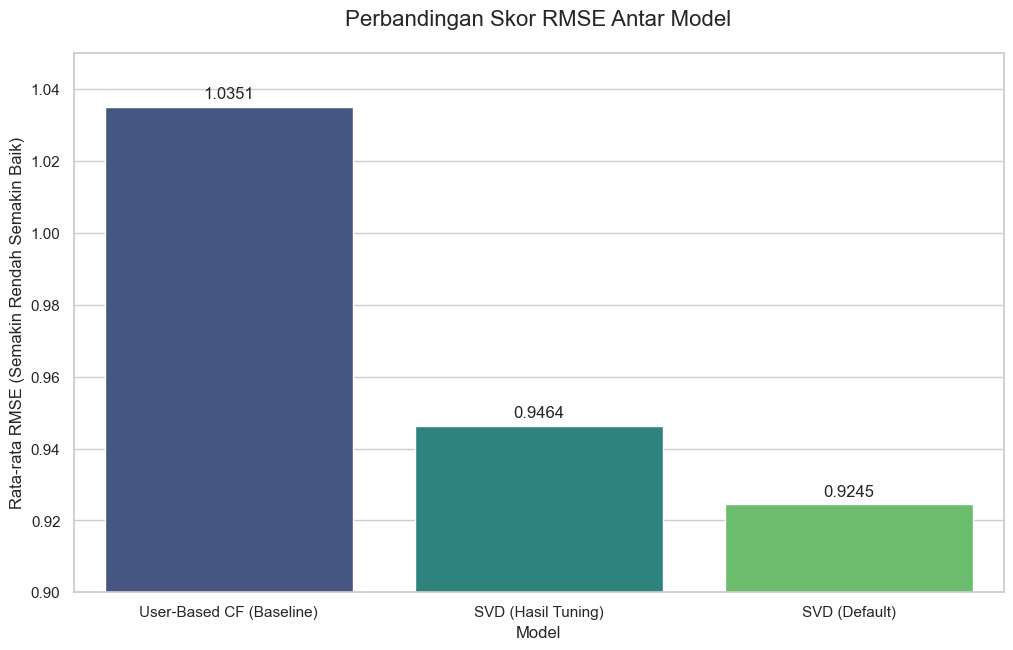

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data Hasil Evaluasi Anda ---
# Nilai-nilai ini diambil dari output sel-sel sebelumnya di notebook Anda
rmse_scores = {
    'User-Based CF (Baseline)': 1.0351, # Dari sel evaluasi UBCF
    'SVD (Default)': 0.9245,            # Dari sel evaluasi SVD
    'SVD (Hasil Tuning)': 0.9464         # Dari sel tuning SVD
}

# Mengubah dictionary menjadi DataFrame untuk plotting
df_scores = pd.DataFrame(list(rmse_scores.items()), columns=['Model', 'RMSE'])

# --- PERBAIKAN UTAMA: Mengurutkan nilai dari tertinggi ke terendah ---
df_scores = df_scores.sort_values('RMSE', ascending=False)

# --- Membuat Visualisasi ---
plt.figure(figsize=(12, 7))

# Membuat bar plot dengan data yang sudah diurutkan
bar_plot = sns.barplot(x='Model', y='RMSE', data=df_scores, palette='viridis')

# Menambahkan judul dan label
plt.title('Perbandingan Skor RMSE Antar Model', fontsize=16, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Rata-rata RMSE (Semakin Rendah Semakin Baik)', fontsize=12)
plt.ylim(0.9, 1.05) # Mengatur limit sumbu y agar perbedaan lebih terlihat

# Menambahkan label nilai di atas setiap bar agar rapi
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=12)

# Menampilkan plot
plt.show()

In [ ]:
# Buat model SVD() default, karena ini model terbaik
final_model_for_submission = SVD()

# Siapkan data latih lengkap
trainset = data.build_full_trainset()

# Latih model pada seluruh data latih
final_model_for_submission.fit(trainset)

# Buat prediksi untuk data tes
submission_predictions = []
for index, row in df_test.iterrows():
    
    pred = final_model_for_submission.predict(uid=row['user_id'], iid=row['product_id'])
    submission_predictions.append(pred.est)

# Klip rating agar tetap di rentang 1-5
clipped_submission_predictions = np.clip(submission_predictions, 1, 5)

# Buat DataFrame untuk file submission
submission_df = pd.DataFrame({
    'ID': df_test['ID'],
    'rating': clipped_submission_predictions
})

# Simpan ke file CSV
submission_df.to_csv('submission.csv', index=False)

print("\n 10 Baris Pertama File Submission")
print(submission_df.head(10))


 10 Baris Pertama File Submission
   ID    rating
0   0  4.716072
1   1  4.171737
2   2  4.596997
3   3  3.375359
4   4  4.413078
5   5  4.291046
6   6  3.711495
7   7  4.636749
8   8  3.970015
9   9  4.078666
